1. Add one more hidden layer to autoencoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32

input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 14s 34ms/step - loss: 0.6954 - val_loss: 0.6953
Epoch 2/5
235/235 [==============================] - 5s 21ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 3/5
235/235 [==============================] - 4s 19ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 4/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 5/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6946 - val_loss: 0.6946


2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib


Epoch 1/5
235/235 [==============================] - 7s 26ms/step - loss: 0.6943 - accuracy: 0.0015 - val_loss: 0.6942 - val_accuracy: 0.0014
Epoch 2/5
235/235 [==============================] - 6s 25ms/step - loss: 0.6941 - accuracy: 0.0015 - val_loss: 0.6941 - val_accuracy: 0.0016
Epoch 3/5
235/235 [==============================] - 6s 26ms/step - loss: 0.6940 - accuracy: 0.0015 - val_loss: 0.6939 - val_accuracy: 0.0016
Epoch 4/5
235/235 [==============================] - 5s 22ms/step - loss: 0.6939 - accuracy: 0.0016 - val_loss: 0.6938 - val_accuracy: 0.0015
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


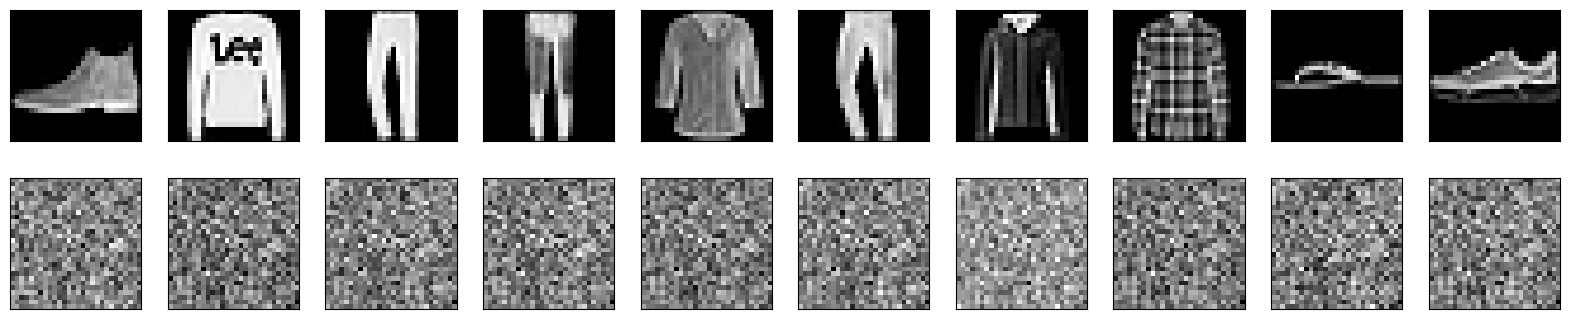

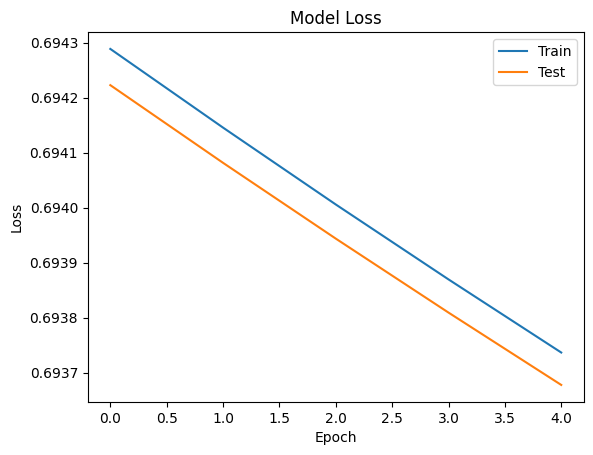

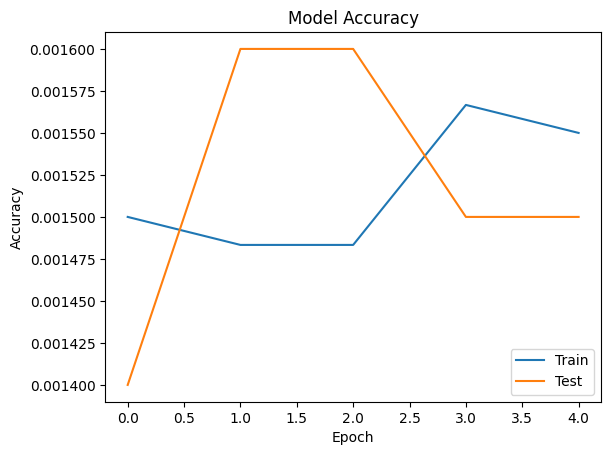

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 32

input_img = Input(shape=(784,))

hidden_1 = Dense(256, activation='relu')(input_img)

encoded = Dense(encoding_dim, activation='relu')(hidden_1)

hidden_2 = Dense(256, activation='relu')(encoded)

# Define the output layer
decoded = Dense(784, activation='sigmoid')(hidden_2)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

# Visualize one of the reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original test image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed test image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


3. Repeat the question 2 on the denoisening autoencoder

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.6981 - val_loss: 0.6979
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6977 - val_loss: 0.6975
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6973 - val_loss: 0.6971
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6969 - val_loss: 0.6968
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6966 - val_loss: 0.6964
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6962 - val_loss: 0.6961
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6959 - val_loss: 0.6957
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6956 - val_loss: 0.6954
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6953 - val_loss: 0.6951
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6950 - val_loss

4. plot loss and accuracy using the history object

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6963 - accuracy: 0.0019 - val_loss: 0.6963 - val_accuracy: 0.0012
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6961 - accuracy: 0.0019 - val_loss: 0.6961 - val_accuracy: 0.0012
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6959 - accuracy: 0.0019 - val_loss: 0.6959 - val_accuracy: 0.0011
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6957 - accuracy: 0.0019 - val_loss: 0.6957 - val_accuracy: 0.0011
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6956 - accuracy: 0.0019 - val_loss: 0.6956 - val_accuracy: 0.0011
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6954 - accuracy: 0.0019 - val_loss: 0.6954 - val_accuracy: 0.0011
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6952 - accuracy: 0.0018 - val_loss: 0.6952 - val_accuracy: 0.0011

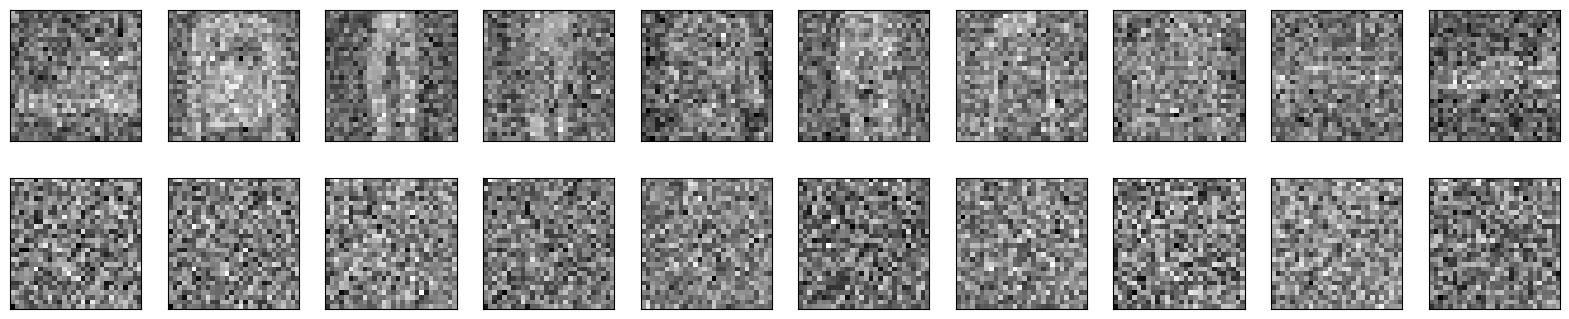

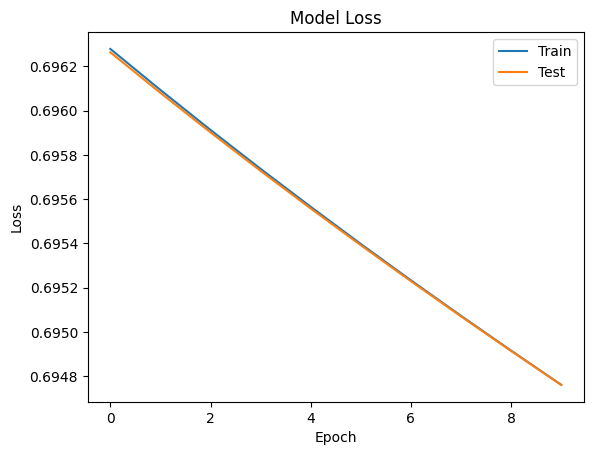

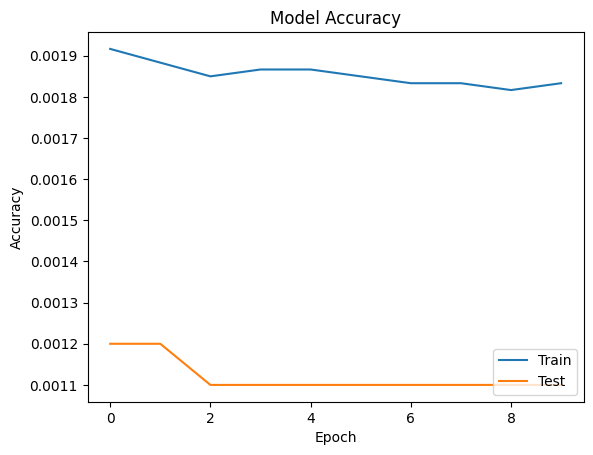

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the data and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize one of the noisy test images
plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Visualize one of the reconstructed test images
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
